This notebook checks conservation laws in the `prince.decays` module

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from prince_cr import decays
from prince_cr.core import PriNCeRun
import prince_cr.config as config

In [4]:
config.tau_dec_threshold = 0.
prince_run = PriNCeRun(max_mass = 1)

PriNCeRun::__init__(): initialising Energy grid
CompositeCrossSection::_join_models(): Attempt to join 2 models.
PhotoNuclearInteractionRate::_init_coupling_mat(): Initiating coupling matrix in (CSR) format


# Test decay distributions for conservation laws

## First use a dense grid in $x=E_{da} / E_{mo}$

In [5]:
from scipy.integrate import trapz

In [6]:
xgrid = np.linspace(0,1,1000)

### Pion decay into muon + muon-neutrino

This is a simple two body decay, so the decay distribution is box shaped,
with the lighter neutrino appearing at lower energies. 

pion to muon:
number 1.000083625002326
energy 0.7866026040573798
pion to numu:
number 0.9989111940234252
energy 0.2134810209449462


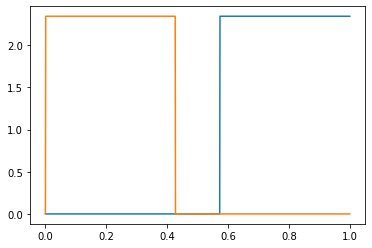

In [7]:
distr = decays.pion_to_muon(xgrid)
plt.plot(xgrid,distr)
print('pion to muon:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

distr = decays.pion_to_numu(xgrid)
plt.plot(xgrid,distr)
print('pion to numu:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

### muon decay for negative helicity

This is a three body decay, which is also helicity suppressed. Therefore the distribution is more complicated

The positron is currently not contained in the code

muon to nue:
number 0.9999989979969961
energy 0.39999999999959845
muon to numubar:
number 1.0
energy 0.29999983299936545


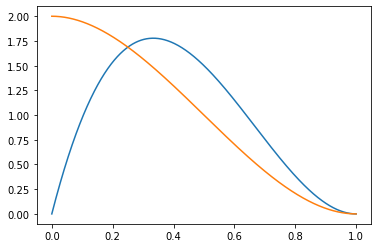

In [8]:
distr = decays.muonplus_to_nue(xgrid, -1)
plt.plot(xgrid,distr)
print('muon to nue:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

distr = decays.muonplus_to_numubar(xgrid, -1)
plt.plot(xgrid,distr)
print('muon to numubar:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

### muon decay for positive helicity

This is a three body decay, which is also helicity suppressed. This looks different form the previous case due to helicity

The positron is currently not contained in the code

muon to nue:
number 1.0000010020030041
energy 0.19999966599913255
muon to numubar:
number 0.9999996659989988
energy 0.3999995546653763


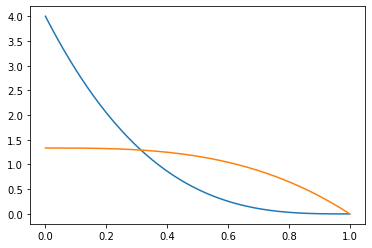

In [9]:
distr = decays.muonplus_to_nue(xgrid, +1)
plt.plot(xgrid,distr)
print('muon to nue:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

distr = decays.muonplus_to_numubar(xgrid, +1)
plt.plot(xgrid,distr)
print('muon to numubar:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

### Neutrino from beta decay

The electron is currently not contained in the code

neutron beta decay:
number 0.9999999999999999
energy 0.0005144961924291011


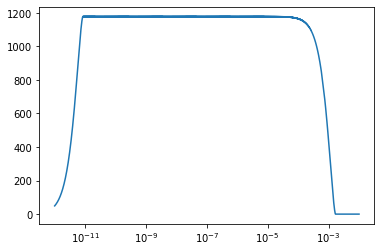

In [10]:
xgrid = np.linspace(0,0.01,10000)
xgrid = np.logspace(-12,-2,10000)
distr = decays.nu_from_beta_decay(xgrid, 100,101)
plt.semilogx(xgrid,distr)
print('neutron beta decay:')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

## Secondly test on logarithmic grid from PriNCe run object

These are the same tests as above, but comparing the precision for the logarithmic grid

In [11]:
ebins = prince_run.cr_grid.bins
egrid = prince_run.cr_grid.grid
widths = prince_run.cr_grid.widths

xbins = ebins / np.max(egrid)
xgrid = egrid / np.max(egrid)
xwidths = widths / np.max(egrid)

xbins_precision = np.logspace(-9,0,10000)

pion to muon:
number 1.1717541808164391
energy 1.0461660881502373
with trapz
number 0.8055500091470553
energy 0.6773429136523575
with trapz
number 1.025222927885891
energy 0.7845138915038503
with trapz, high bin number
number 0.9997248185758446
energy 0.7863970741586509
------------------------------------------------------------
pion to numu:
number 1.129018272358717
energy 0.2720753376020155
with trapz
number 0.9878312685121782
energy 0.20402772016992438
with trapz, high bin number
number 1.0004515295939247
energy 0.21363818319865116
------------------------------------------------------------
pion to muon:
number 1.0
energy 0.8030503615723897
pion to muon:
number 0.9999999999732269
energy 0.21766878325865793


(-0.1, 2.5)

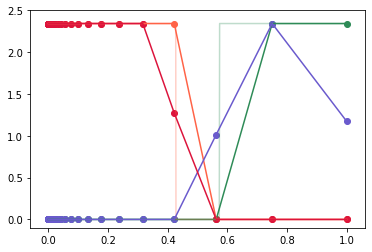

In [12]:
distr = decays.pion_to_muon(xgrid)
plt.plot(xgrid,distr,color = 'seagreen')
plt.scatter(xgrid,distr,color = 'seagreen')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

print('with trapz')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

distr = decays.pion_to_muon(xbins)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))

distr = decays.pion_to_muon(xbins_precision)
plt.plot(xbins_precision,distr, color = 'seagreen', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))

print('--'*30)
distr = decays.pion_to_numu(xgrid)
plt.plot(xgrid,distr,color = 'tomato')
plt.scatter(xgrid,distr,color = 'tomato')
print('pion to numu:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.pion_to_numu(xbins)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))


distr = decays.pion_to_numu(xbins_precision)
plt.plot(xbins_precision,distr,color = 'tomato', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))


print('--'*30)
distr = decays.pion_to_muon_avg(xbins[:-1],xbins[1:])
plt.plot(xgrid,distr,color = 'slateblue')
plt.scatter(xgrid,distr,color = 'slateblue')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.pion_to_numu_avg(xbins[:-1],xbins[1:])
plt.plot(xgrid,distr,color = 'crimson')
plt.scatter(xgrid,distr,color = 'crimson')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

plt.ylim(-0.1,2.5)
# for x in xbins:
#     plt.axvline(x, alpha = 0.3)
# plt.loglog()

pion to muon:
number 0.9912307436257647
energy 0.39480997502883963
with trapz
number 1.0119017807132353
energy 0.40304330686283046
with trapz
number 1.0162866143992961
energy 0.4083405253460312
with trapz, high bin number
number 1.0000007158940363
energy 0.40000028635244844
------------------------------------------------------------
pion to numu:
number 0.992291763186399
energy 0.29680844894724057
with trapz
number 1.0149991741089015
energy 0.30549461084855967
with trapz, high bin number
number 1.0000007138971112
energy 0.3000002147664888


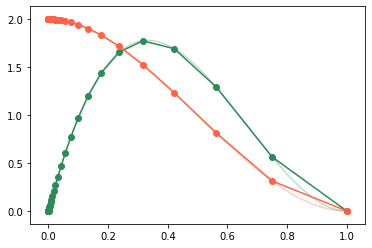

In [13]:
distr = decays.muonplus_to_nue(xgrid, -1)
plt.plot(xgrid,distr,color = 'seagreen')
plt.scatter(xgrid,distr,color = 'seagreen')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

print('with trapz')
print('number', trapz(distr, xgrid))
print('energy', trapz(xgrid * distr, xgrid))

distr = decays.muonplus_to_nue(xbins, -1)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))

distr = decays.muonplus_to_nue(xbins_precision, -1)
plt.plot(xbins_precision,distr, color = 'seagreen', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))

print('--'*30)
distr = decays.muonplus_to_numubar(xgrid, -1)
plt.plot(xgrid,distr,color = 'tomato')
plt.scatter(xgrid,distr,color = 'tomato')
print('pion to numu:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.muonplus_to_numubar(xbins, -1)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))


distr = decays.muonplus_to_numubar(xbins_precision, -1)
plt.plot(xbins_precision,distr,color = 'tomato', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))


pion to muon:
number 0.9933527827470335
energy 0.19880692286564172
with trapz
number 1.0137117338185067
energy 0.20264869635108834
with trapz, high bin number
number 1.0000007119001864
energy 0.2000001431805293
------------------------------------------------------------
pion to numu:
number 0.966498746383213
energy 0.37123987854749413
with trapz
number 1.0262857898066393
energy 0.4171692391844013
with trapz, high bin number
number 0.9999992827685305
energy 0.39999885456396583


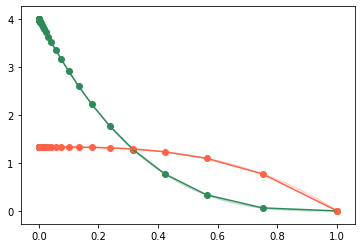

In [14]:
distr = decays.muonplus_to_nue(xgrid, 1)
plt.plot(xgrid,distr,color = 'seagreen')
plt.scatter(xgrid,distr,color = 'seagreen')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.muonplus_to_nue(xbins, 1)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))

distr = decays.muonplus_to_nue(xbins_precision, 1)
plt.plot(xbins_precision,distr, color = 'seagreen', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))

print('--'*30)
distr = decays.muonplus_to_numubar(xgrid, 1)
plt.plot(xgrid,distr,color = 'tomato')
plt.scatter(xgrid,distr,color = 'tomato')
print('pion to numu:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.muonplus_to_numubar(xbins, 1)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))


distr = decays.muonplus_to_numubar(xbins_precision, 1)
plt.plot(xbins_precision,distr,color = 'tomato', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))


pion to muon:
number 0.9795720932951314
energy 0.0005050972715397364
with trapz
number 1.0
energy 0.0005150995552957588
with trapz, high bin number
number 1.0
energy 0.0005144947038420289


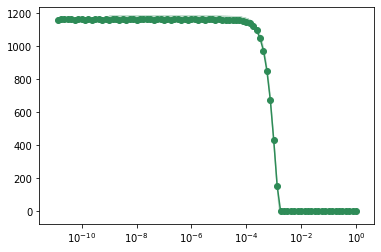

In [15]:
distr = decays.nu_from_beta_decay(xgrid, 100,101)
plt.semilogx(xgrid,distr,color = 'seagreen')
plt.scatter(xgrid,distr,color = 'seagreen')
print('pion to muon:')
print('number', np.sum(distr * xwidths))
print('energy', np.sum(distr * xwidths * xgrid))

distr = decays.nu_from_beta_decay(xbins, 100,101)
print('with trapz')
print('number', trapz(distr, xbins))
print('energy', trapz(xbins * distr, xbins))

distr = decays.nu_from_beta_decay(xbins_precision, 100,101)
plt.semilogx(xbins_precision,distr, color = 'seagreen', alpha = 0.3)
print('with trapz, high bin number')
print('number', trapz(distr, xbins_precision))
print('energy', trapz(xbins_precision * distr, xbins_precision))
